# HR Analytics Project- Understanding the Attrition in HR

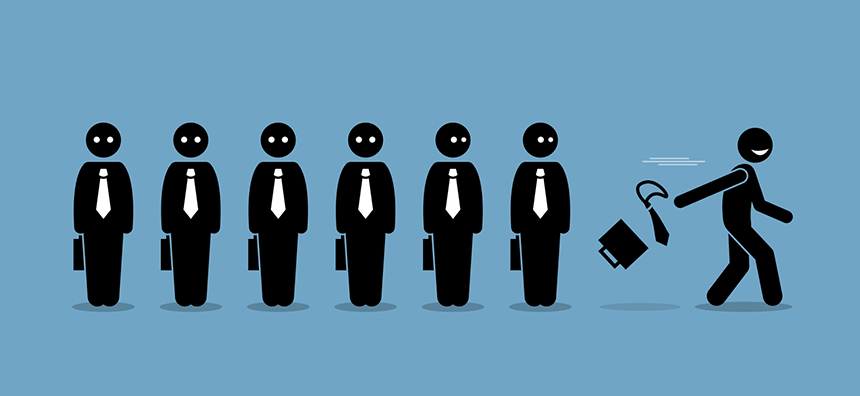

Dataset  

    This dataset contains information regarding employee attrition which can be used to analyse the trends and patterns of attrition. Based on the relevant features, machine learning model can be built for prediction of attrition which can be used in HR analytics for identifying employees prone to attrition and develop employee retention strategies.


Input features

    Age		
    BusinessTravel	
    DailyRate	
    Department	
    DistanceFromHome	
    Education	
    EducationField	
    EmployeeCount	
    EmployeeNumber
    EnvironmentSatisfaction
    Gender
    HourlyRate
    JobInvolvement
    JobLevel
    JobRole
    JobSatisfaction
    MaritalStatus
    MonthlyIncome
    MonthlyRate
    NumCompaniesWorked
    Over18
    OverTime
    PercentSalaryHike
    PerformanceRating
    RelationshipSatisfaction	
    StandardHours	
    StockOptionLevel	
    TotalWorkingYears	
    TrainingTimesLastYear	
    WorkLifeBalance	
    YearsAtCompany	
    YearsInCurrentRole	
    YearsSinceLastPromotion	
    YearsWithCurrManager

Output label  

    Attrition

Aim: 
 
    Develop a machine learning model to predict the attrition of employees based on different features (Classification model)

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data

hr_df=pd.read_csv(r"C:\Users\gowri\Downloads\ibm-hr-analytics-employee-attrition-performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
hr_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Data pre-processing & EDA

In [4]:
# create a copy of the dataset for analysis

hr_df1=hr_df.copy()

In [5]:
hr_df1.shape

(1470, 35)

In [6]:
hr_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
hr_df1.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observation:  

    There are 1470 records in the dataset  
    There are no nulls observed in the dataset  
    Out of 35 columns, 26 have int64 and 9 have float64 datatype

In [8]:
hr_df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
# check for duplicates

duplicates=hr_df1.duplicated()

print('No. of duplicates in the dataset: ', hr_df1.duplicated().sum())
print('Index of duplicates in the dataset: ', hr_df1[duplicates].index)

No. of duplicates in the dataset:  0
Index of duplicates in the dataset:  Index([], dtype='int64')


In [10]:
# check number of unique values in each column

unique=hr_df1.nunique()
pd.DataFrame(unique,columns=['No. of unique values'])

,No. of unique values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [11]:
# take the count of each unique value in each column

for i in hr_df1.columns:
    print(hr_df1.value_counts(hr_df1[i]),'\n')

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64 

Attrition
No     1233
Yes     237
Name: count, dtype: int64 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64 

DailyRate
691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: count, Length: 886, dtype: int64 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64 

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6

Observation:  

    About the dataset:
    
    Data majorly contains details of employees who has not attritioned
    Majority employees in the dataset have travelled rarely for business requirements
    Data represent employees from 3 departments - Research & Development, Sales and Human Resources out of which most employees are from Research & Development department
    Majority employees has Education field as Life Sciences and Job role as Sales Executive 
    Males are more represented in the data than females
    Standard working hours of all employees is 80 hours
    Married employees are common than single/divorced employees
    All employees are over 18 in age and age ranges from 18-60 years
    Overtime is not common for the employees in the dataset
    We can drop employee count, employee number, standard hours and over18 as they are irrelevant for further data analysis and model building

In [12]:
# drop irrelevant columns

hr_df1.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1,inplace=True)

In [13]:
hr_df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
# replace age with re-defined age_group 

age_group=[]
for i in hr_df1['Age']:
    if 18<=i<=25:
        age_group.append('18-25')
    elif 26<=i<=35:
        age_group.append('26-35')
    elif 36<=i<=45:
        age_group.append('36-45')
    elif 46<=i<=55:
        age_group.append('46-55')
    else:
        age_group.append('56-60')

hr_df1['age_group'] = age_group
hr_df1.drop(['Age'],axis=1,inplace=True)
hr_df1.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,36-45
1,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,46-55
2,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,36-45
3,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,26-35
4,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,26-35


age_group: 

    18-25 (Young Adults)
    26-35 (Adults)
    36-45 (Middle-aged Adults)
    46-55 (Older Adults)
    56-60 (Pre-retirement)

In [15]:
hr_df1.dtypes

Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

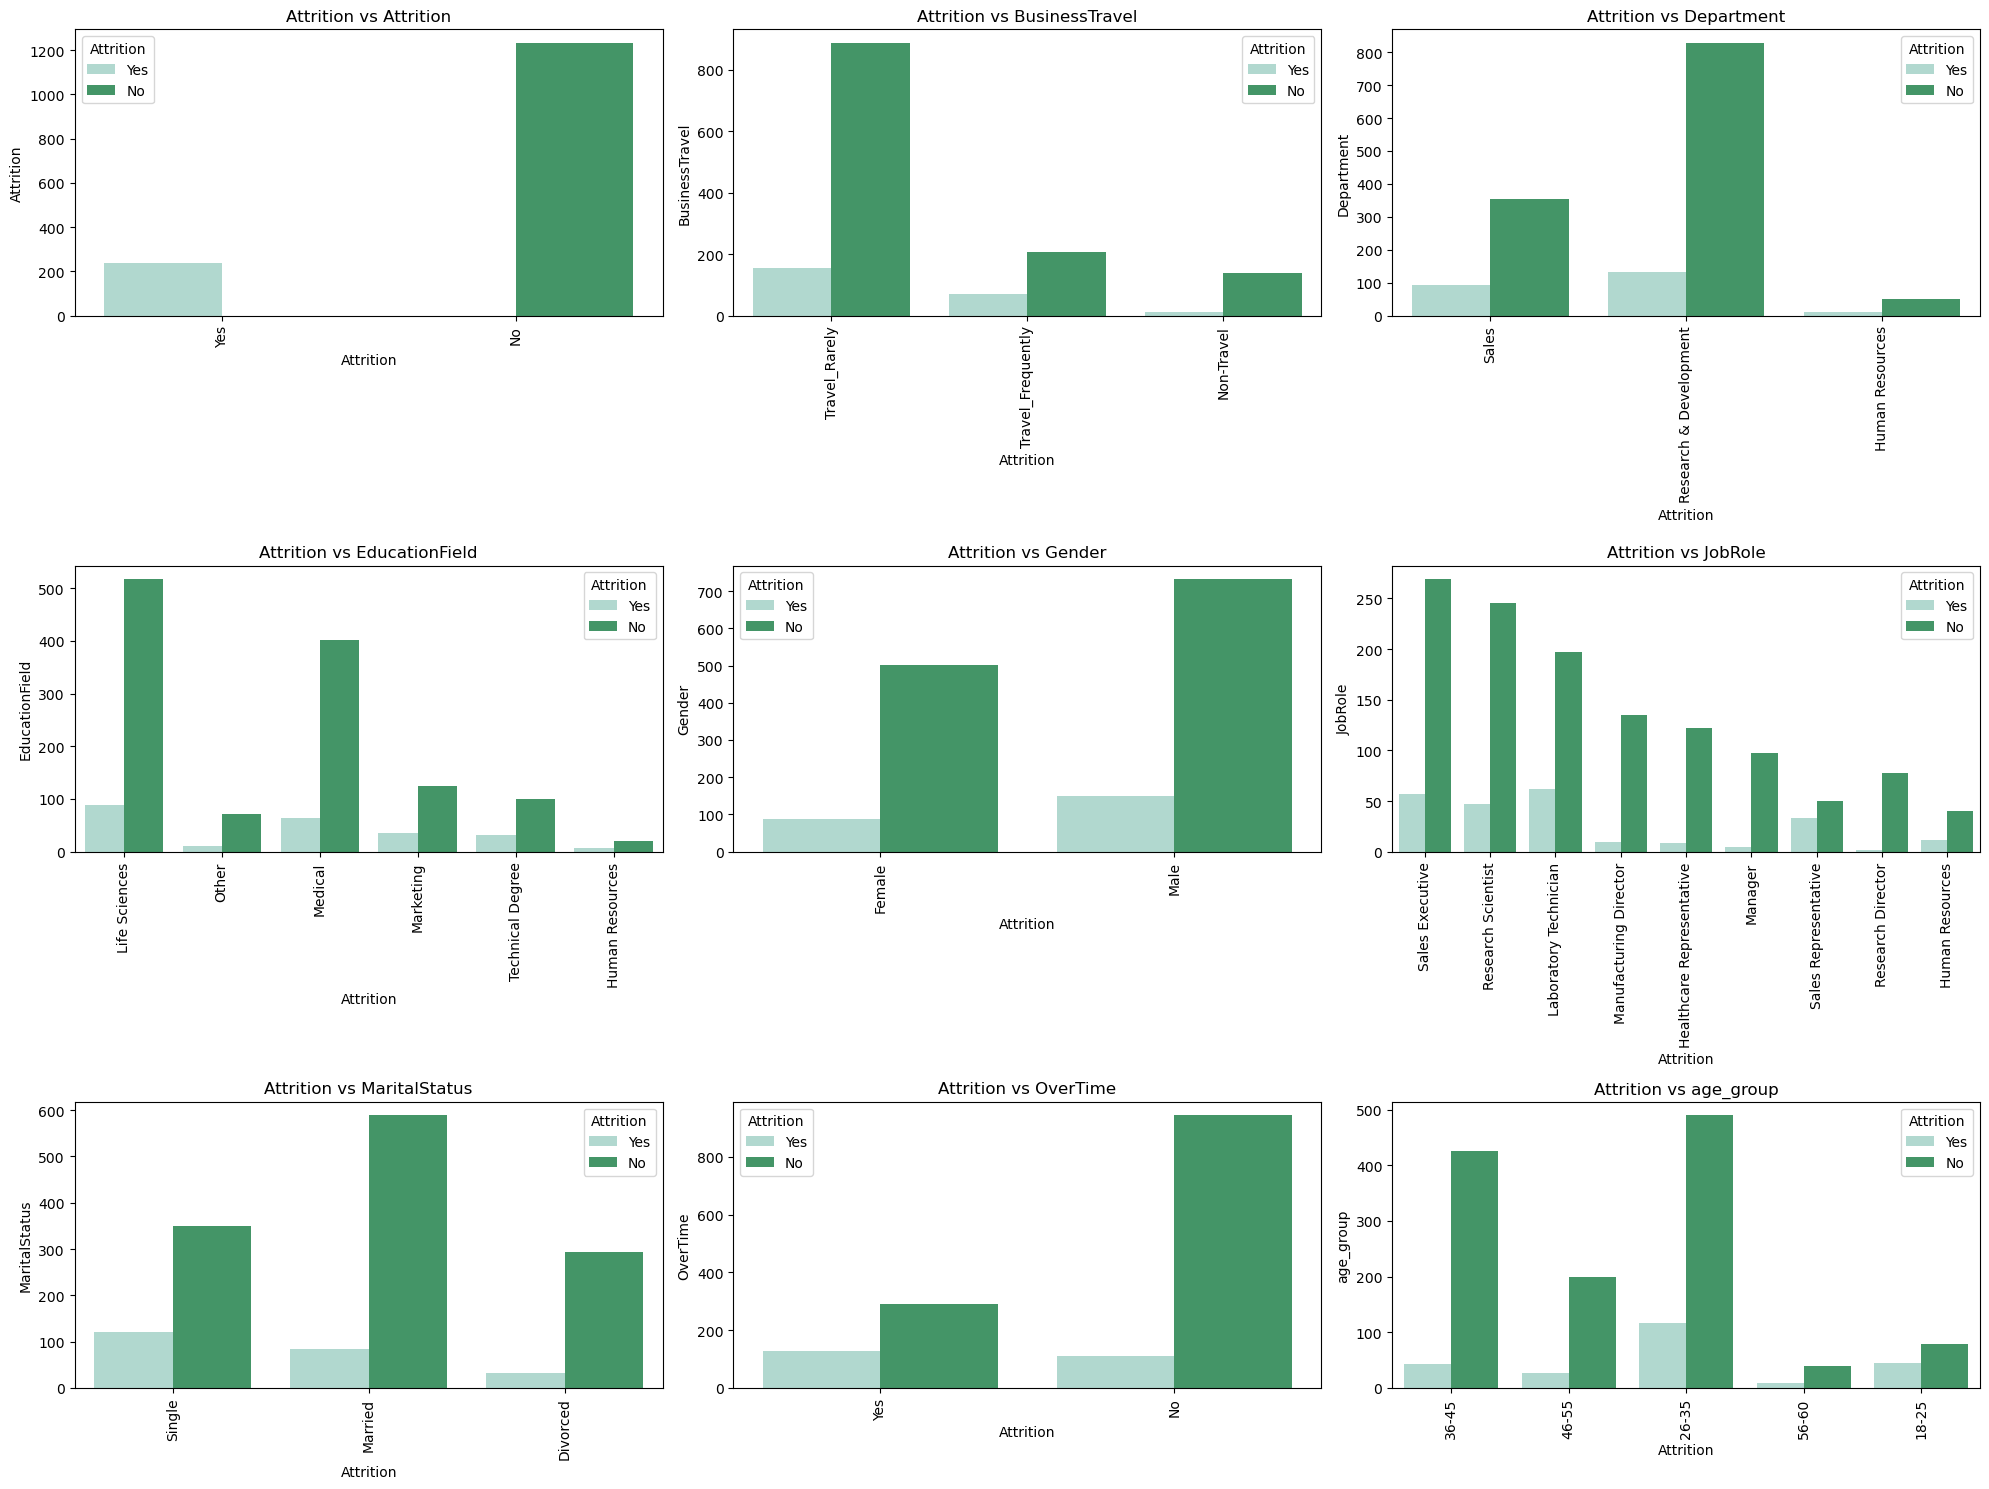

In [16]:
# checking Attrition vs categorical features

cat=hr_df1.select_dtypes(include='object').columns
plt.figure(figsize=(20,15))
plot=1
for i in cat:
    if plot<=9:
        plt.subplot(3,3,plot)
        sns.countplot(hue='Attrition',x=i,data=hr_df1, palette='BuGn')
        plt.xlabel('Attrition')
        plt.xticks(rotation=90)
        plt.ylabel(i)   
        plt.title(f'Attrition vs {i}')
        plot+=1
plt.tight_layout()

Observation:  

    Employees who have attritioned more showed the following trends:
        Travelled rarely
        Belonged to Research & Development department
        Education field was Life Sciences
        Male gender attritioned more
        Job role was Laboratory Technician
        Marital status was single
        Done overtime work
        Belonged to 26-35 age category
        
    Employees who has not attritioned/ employees who stayed back in the employment showed the following trends:
        Travelled rarely
        Belonged to Research & Development department
        Education field was Life Sciences
        Male gender was more prominent
        Job role was Sales Executive
        Marital status was married
        No/less overtime work
        Belonged to 26-35 age category
        
    Key findings:
        Single employees tend to attrition more than married employees
        Laboratory Technicians are more prone to attrition
        Overtime work is one of the causes of attrition
        

In [17]:
# % attrition due to overtime

hr_df1_attrition=hr_df1[hr_df1['Attrition']=='Yes']
count= len(hr_df1_attrition[hr_df1_attrition['OverTime']=='Yes'])
total=len(hr_df1_attrition)
percent=count/total*100
print(f'Attrition percentage due to Overtime work is {percent:.2f}%')

Attrition percentage due to Overtime work is 53.59%


In [18]:
hr_df1.select_dtypes(include='int64').columns

Index(['DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

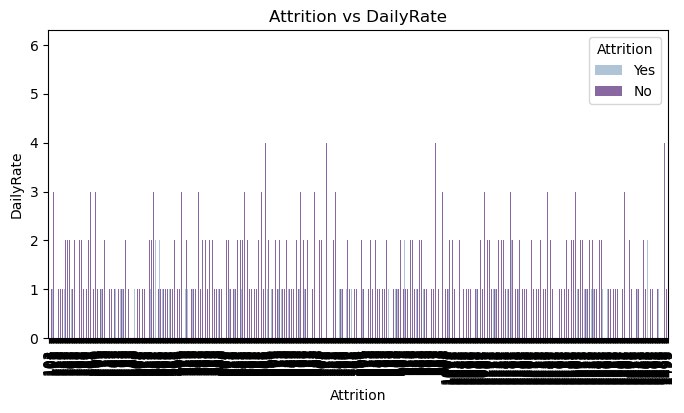

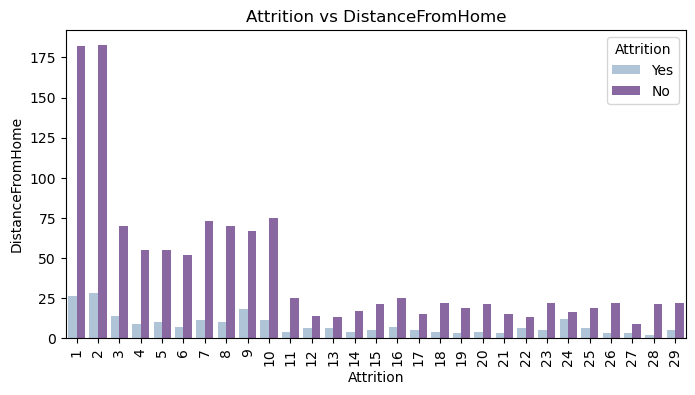

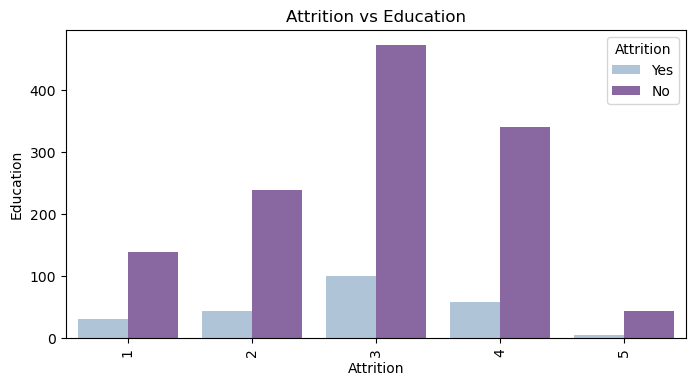

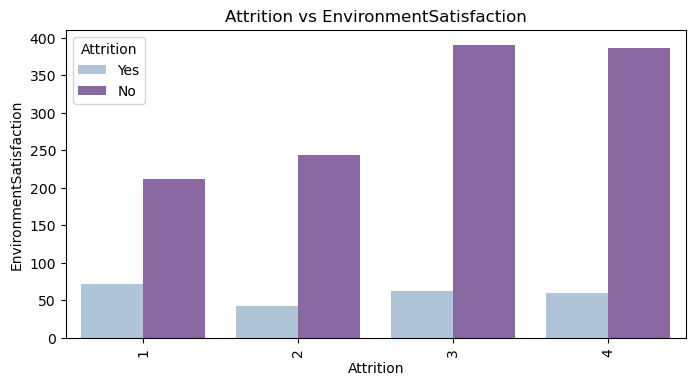

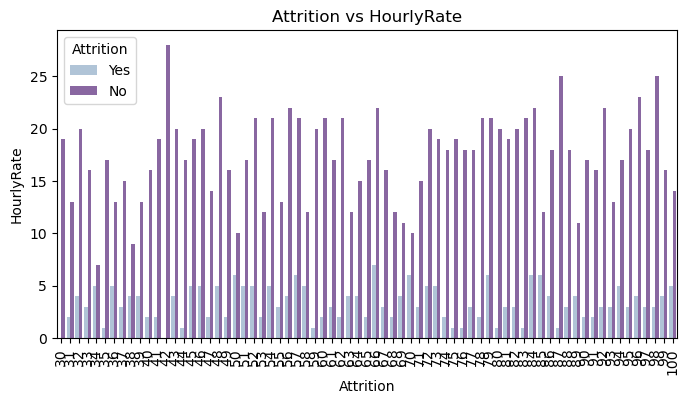

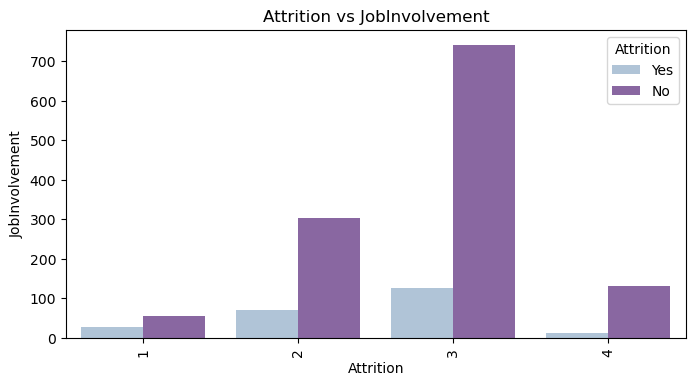

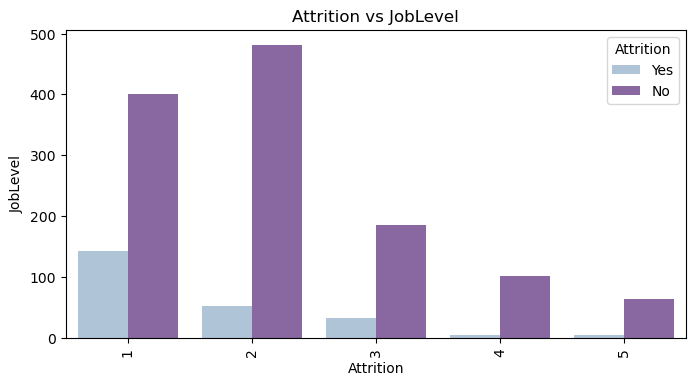

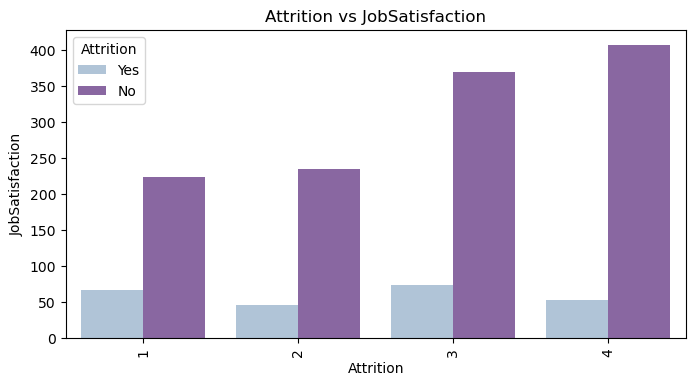

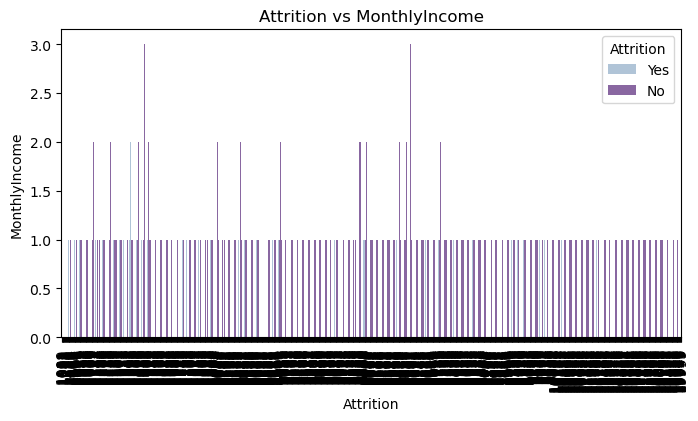

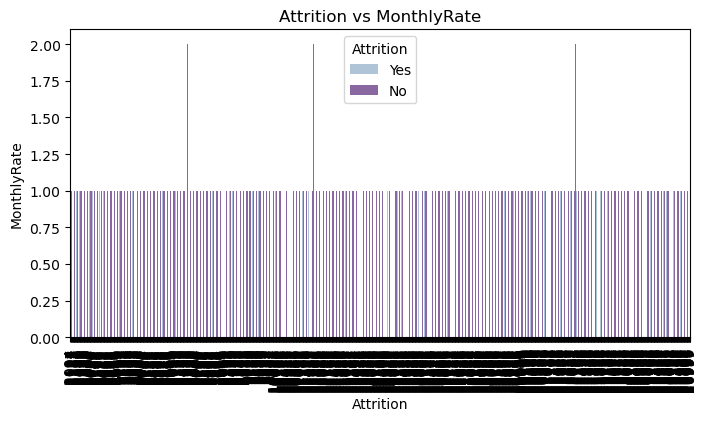

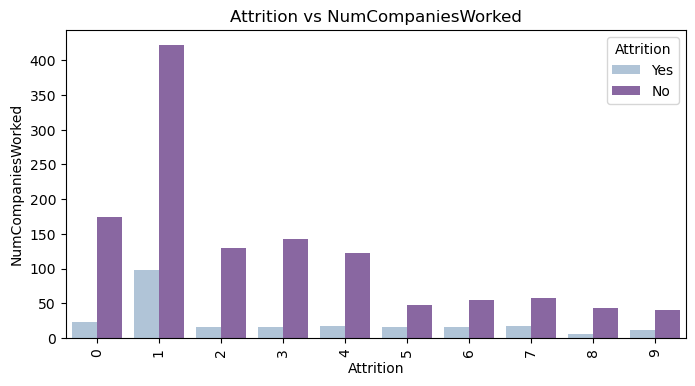

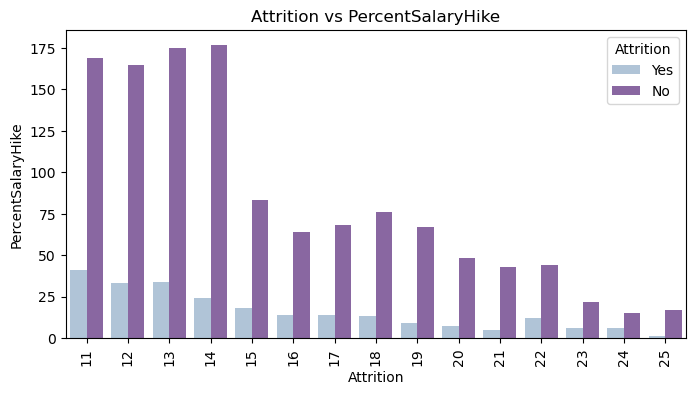

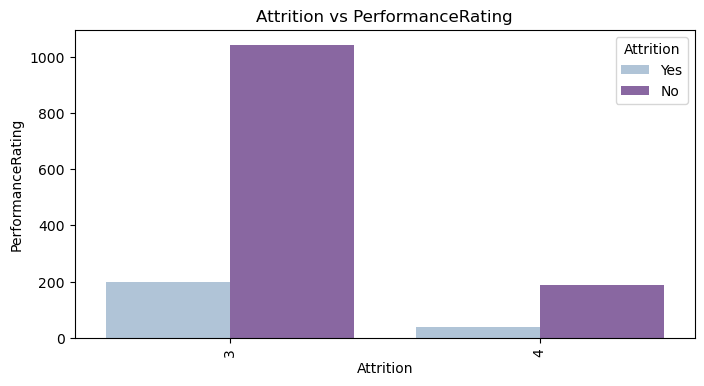

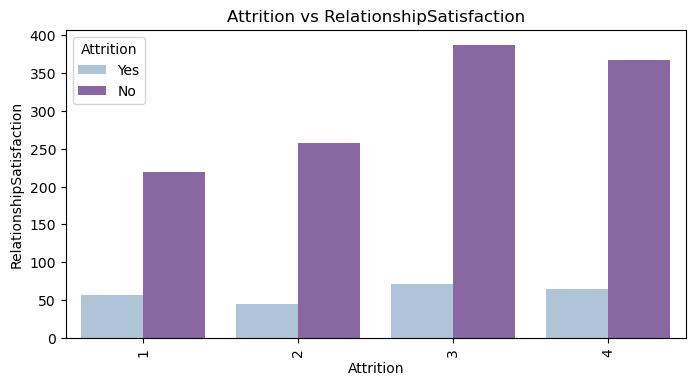

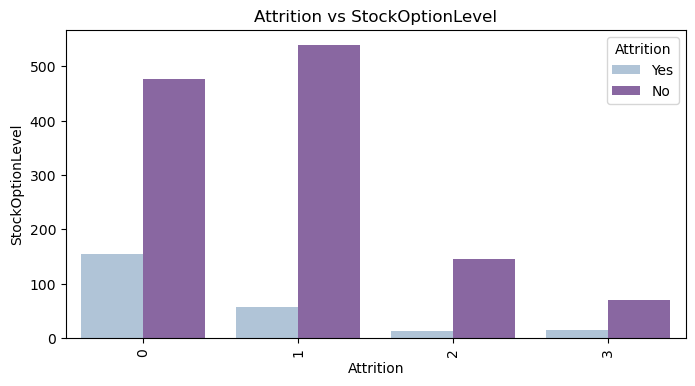

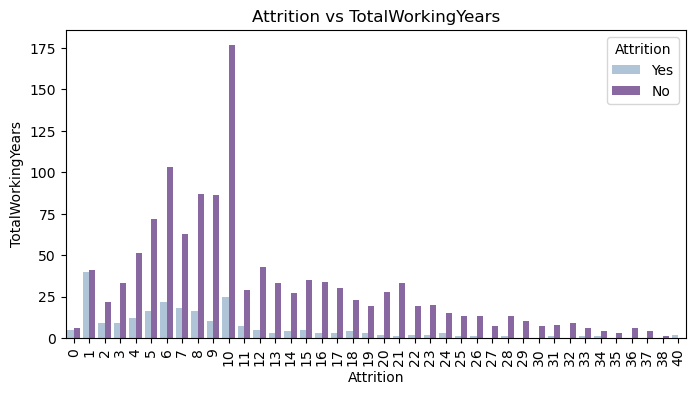

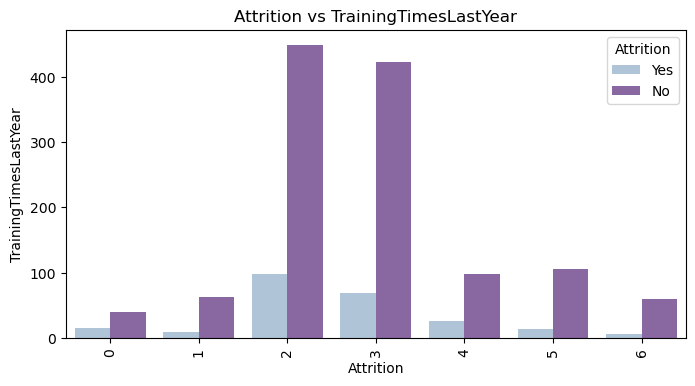

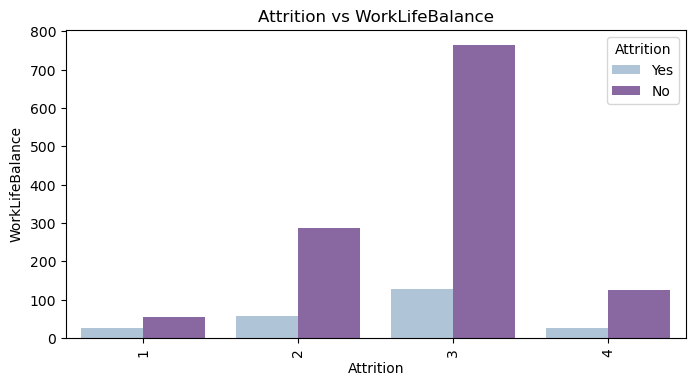

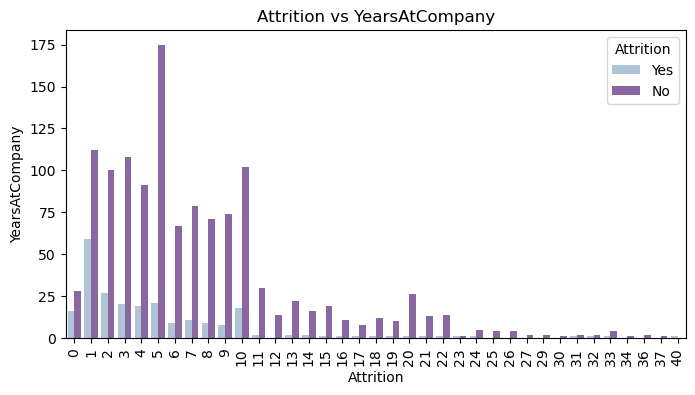

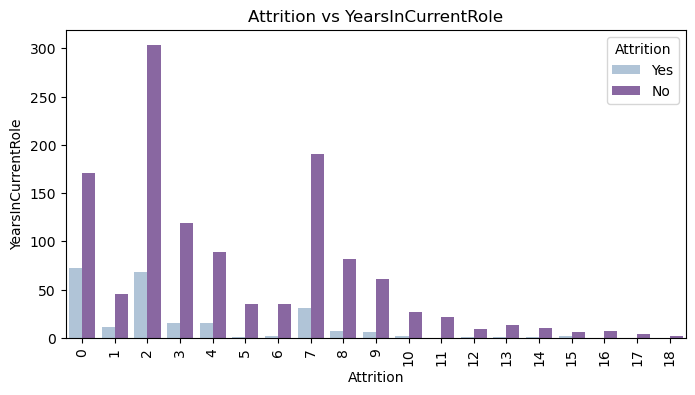

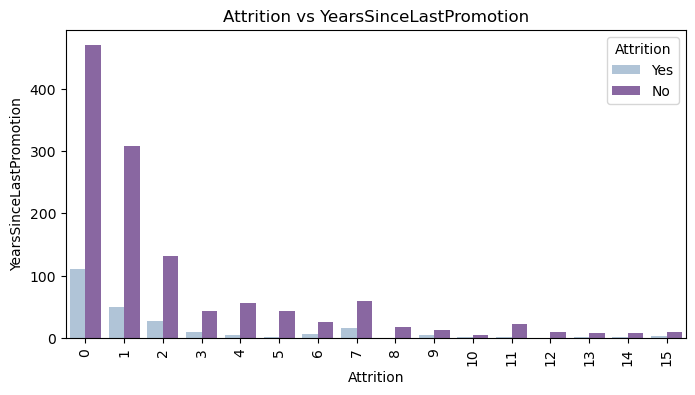

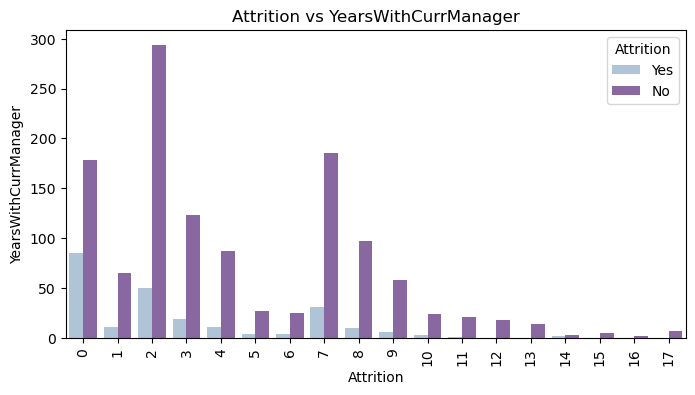

In [19]:
# checking Attrition vs numerical features

num=hr_df1.select_dtypes(include='int64').columns


for i in num:
    plt.figure(figsize=(8,4))
    sns.countplot(hue='Attrition',x=i,data=hr_df1, palette='BuPu')
    plt.xlabel('Attrition',fontsize=10)
    plt.xticks(rotation=90)
    plt.ylabel(i,fontsize=10)   
    plt.title(f'Attrition vs {i}')
    plt.show()

Observation:  

    Employees who have attritioned more showed the following trends:
        Total working year is 1  
                  
    Key findings:
        Employees at the early stages of theor career are more prone to attrition
        

In [21]:
# encode categorical features by label encoding 

hr_df2=hr_df1.copy()
le=LabelEncoder()

for col in cat:
    hr_df2[col]=le.fit_transform(hr_df2[col])
hr_df2.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_group
0,1,2,1102,2,1,2,1,2,0,94,...,1,0,8,0,1,6,4,0,5,2
1,0,1,279,1,8,1,1,3,1,61,...,4,1,10,3,3,10,7,1,7,3
2,1,2,1373,1,2,2,4,4,1,92,...,2,0,7,3,3,0,0,0,0,2
3,0,1,1392,1,3,4,1,4,0,56,...,3,0,8,3,3,8,7,3,0,1
4,0,2,591,1,2,1,3,1,1,40,...,4,1,6,3,3,2,2,2,2,1


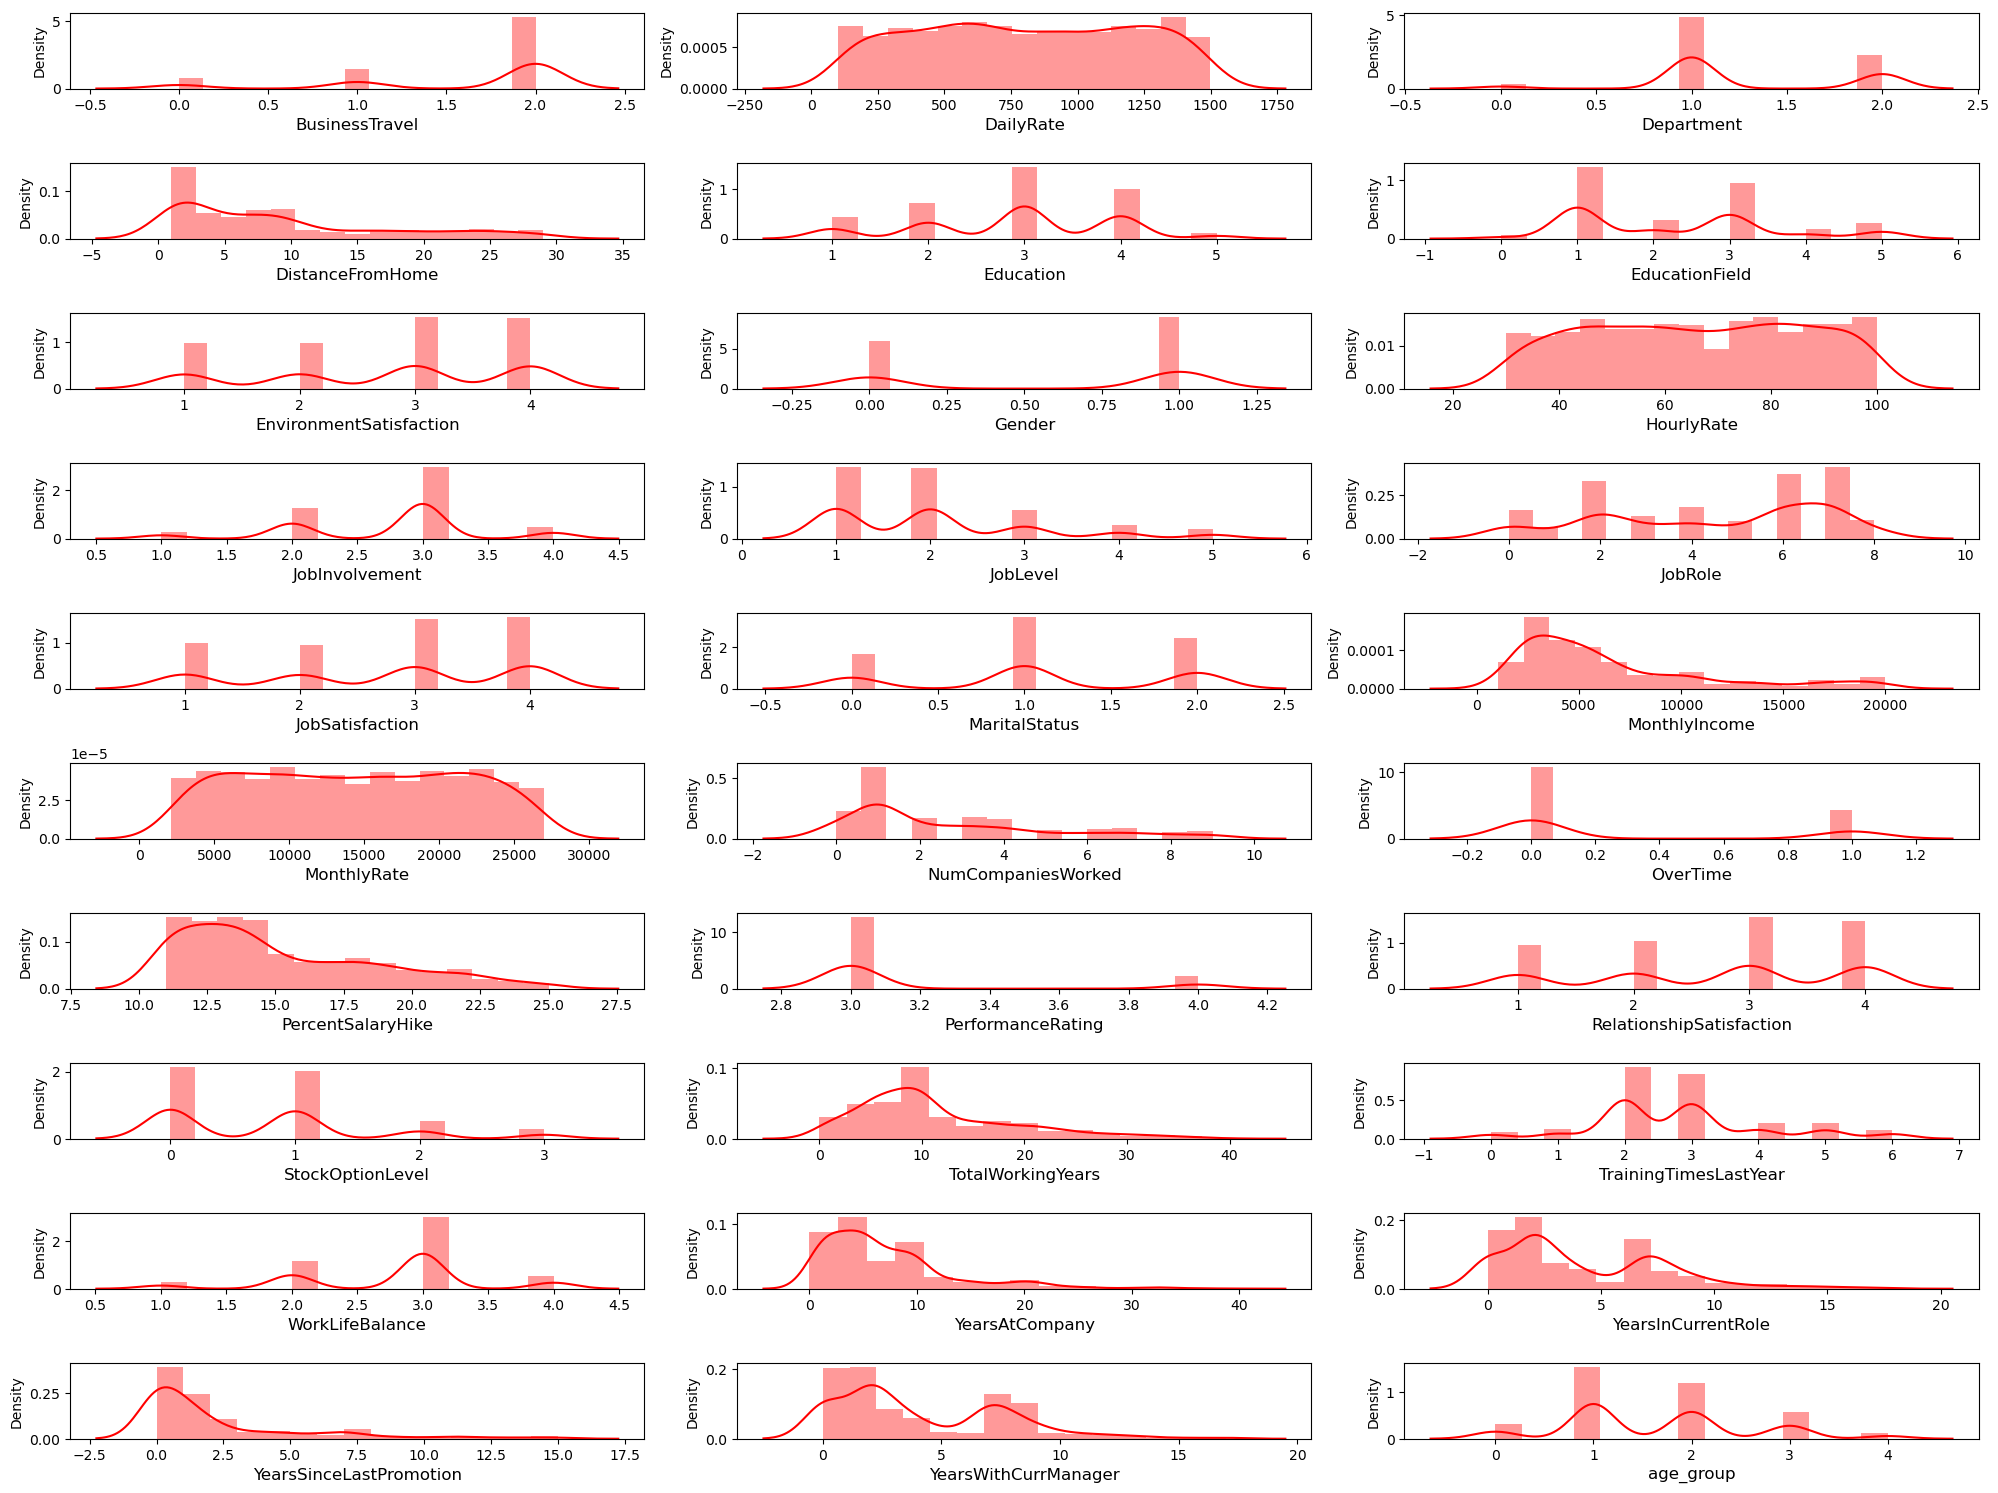

In [22]:
# check data distribution

x=hr_df2.drop('Attrition',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=30:
        ax=plt.subplot(10,3,plot)
        sns.distplot(x[col],bins=15, color='red')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observation:  

    Dataset is almost symmetrically distributed

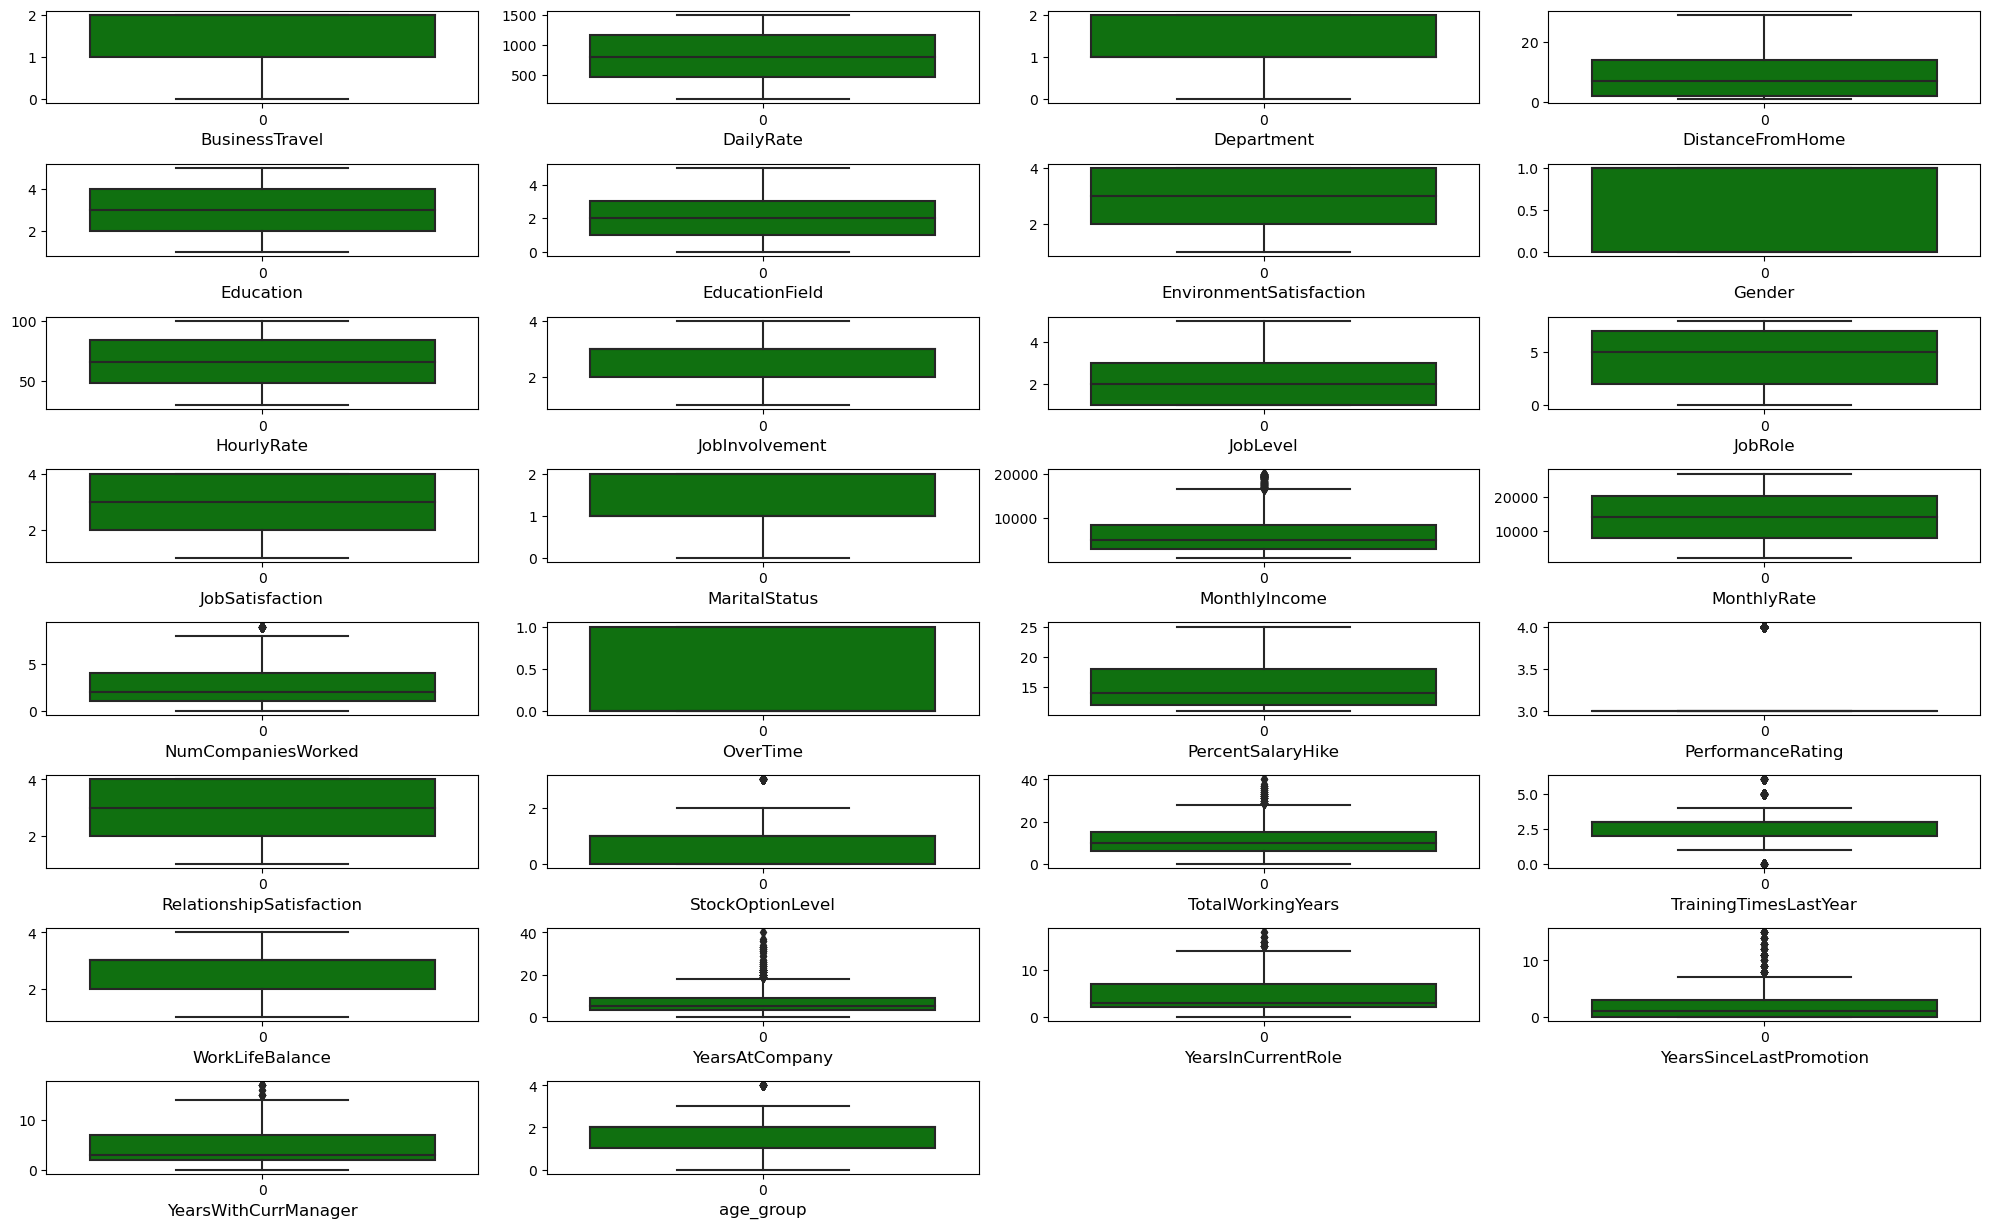

In [23]:
# check outliers

x=hr_df2.drop('Attrition',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=30:
        ax=plt.subplot(10,4,plot)
        sns.boxplot(x[col], color='green')
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

# Feature Selection

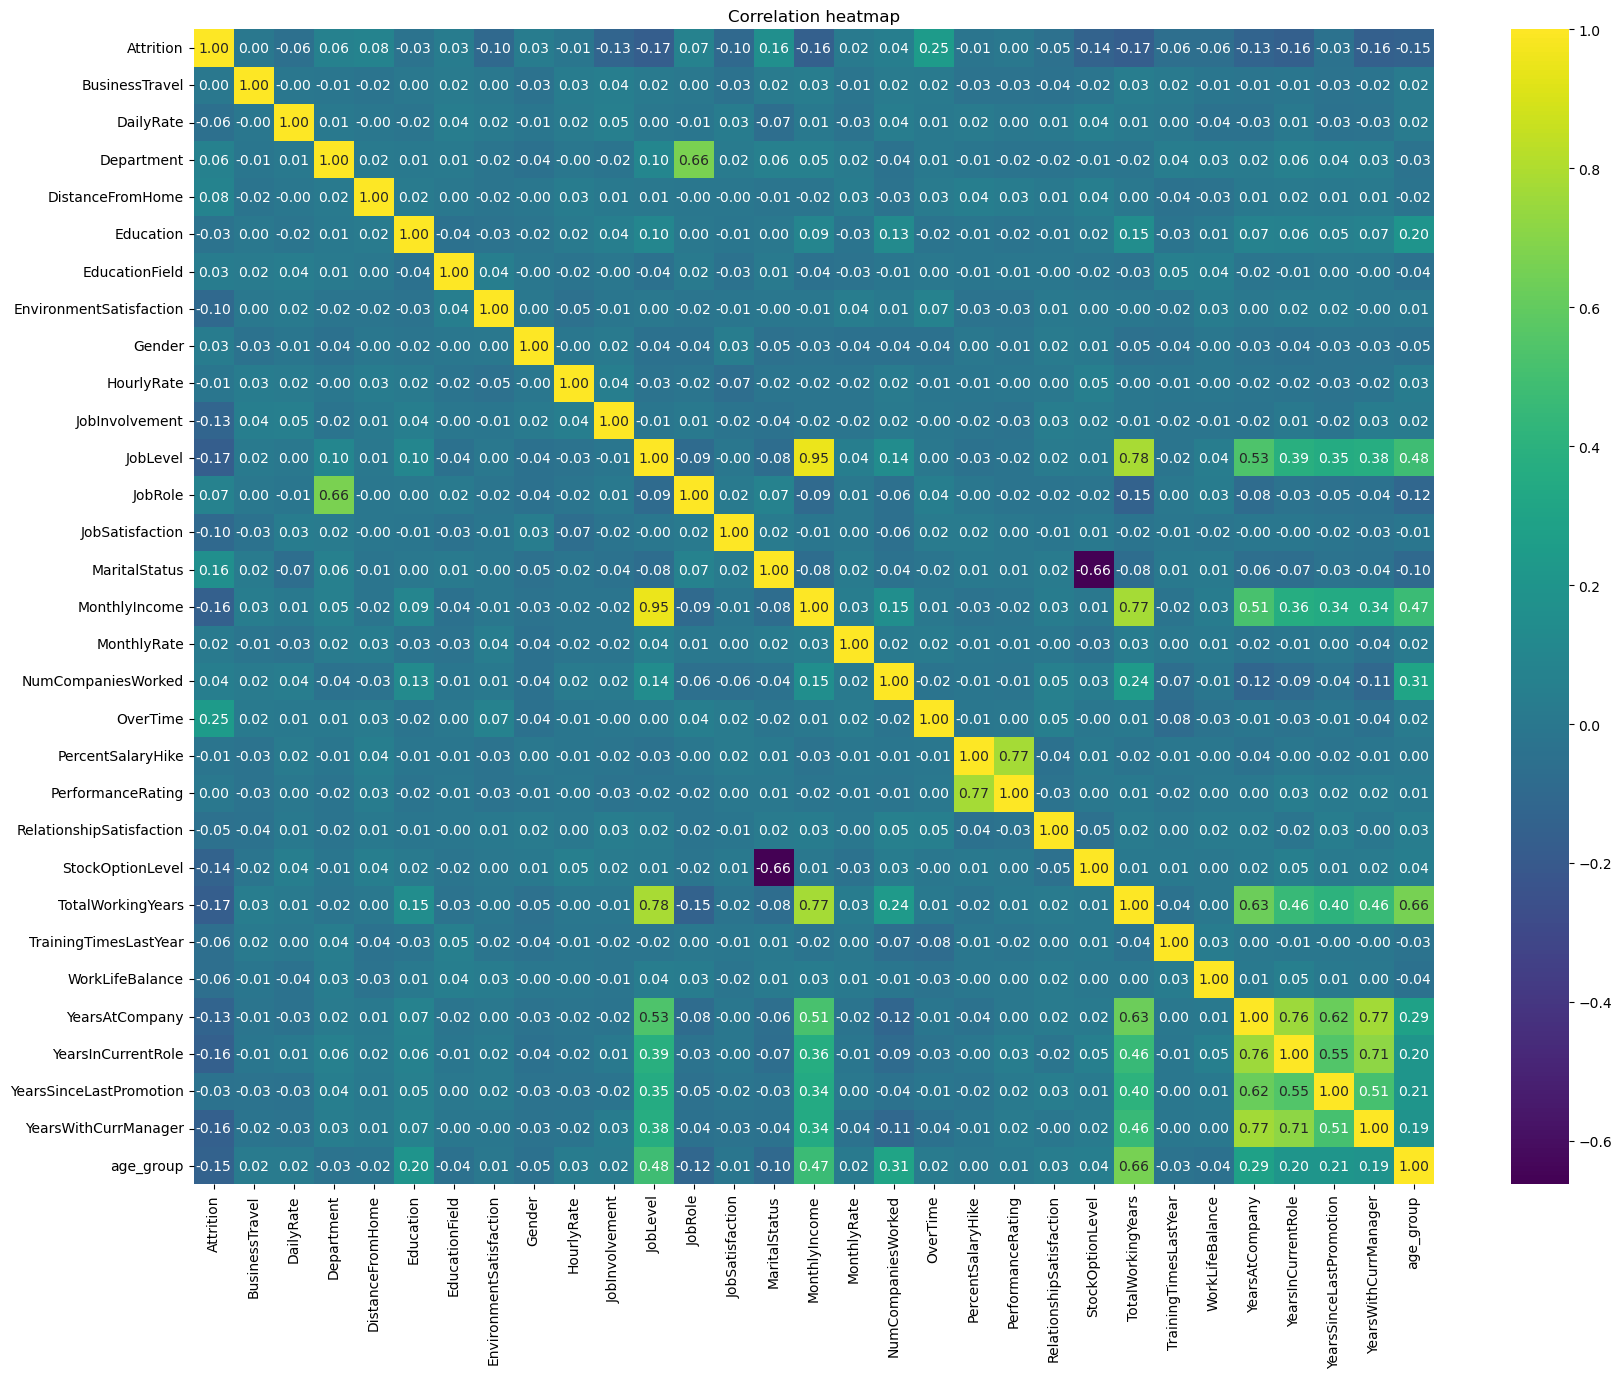

In [24]:
# check for correlation

cm= hr_df2.corr()
plt.figure(figsize=(20,15))

sns.heatmap(cm, annot=True,cmap='viridis',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

Observation:  
    
    High multicollineairity (>0.5) exists between:
        Total working years with monthly income (+0.77), job level (+0.78), age_group (+0.66), years at company (+0.63)
        Stock option level and marital status (-0.66)
        Job role and department (+0.66)
        Monthly income and job level (+0.95)

In [25]:
# confirm multicollinearity by vif

x=hr_df2.drop('Attrition',axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
10,JobLevel,11.813867
14,MonthlyIncome,11.047469
22,TotalWorkingYears,4.788370
25,YearsAtCompany,4.613176
28,YearsWithCurrManager,2.781247
26,YearsInCurrentRole,2.727825
18,PercentSalaryHike,2.519692
19,PerformanceRating,2.518169
29,age_group,1.959932
2,Department,1.942233


Observation:  

    There is multicollinearity as evident by the high vif values in job level and monthly income. We can drop either or both and check if it solves multicollinearity problem

In [26]:
# confirm multicollinearity by vif

x=hr_df2.drop(['Attrition','JobLevel'],axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
21,TotalWorkingYears,4.654777
24,YearsAtCompany,4.612750
27,YearsWithCurrManager,2.775571
25,YearsInCurrentRole,2.727313
13,MonthlyIncome,2.584788
17,PercentSalaryHike,2.518752
18,PerformanceRating,2.518161
28,age_group,1.959564
10,JobRole,1.866602
2,Department,1.849179


Observation:  

    Multicollinearity has reduced below 5. So we can proceed with the data

In [27]:
# splitting data into features(x) and label(y)

x=hr_df2.drop(['Attrition','JobLevel'],axis=1)
y=hr_df2['Attrition']

In [28]:
# transforming and splitting training and testing sets

scaler = StandardScaler()
x_scaled =scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=67)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1102, 29) (1102,) (368, 29) (368,)


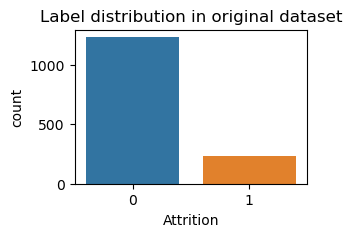

In [29]:
# checking for data imbalance

plt.figure(figsize=(3,2))
sns.countplot(x='Attrition',data=hr_df2)
plt.title('Label distribution in original dataset')
plt.show()

Observation:  

    There is significant imbalance in the dataset as it mostly represents employees who has not attritioned. Imbalance can be handled by oversampling using SMOTE. 

In [30]:
# oversampling by SMOTE

from imblearn.over_sampling import SMOTE as smt
over=smt(random_state=78,k_neighbors=3,sampling_strategy='auto')
X_train,Y_train=over.fit_resample(x_train,y_train)

Text(0.5, 1.0, 'Label distribution after oversampling')

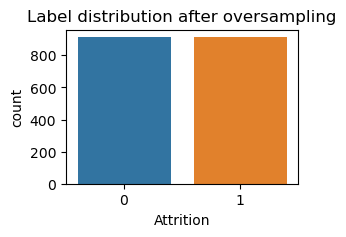

In [31]:
Ytrain_df=pd.DataFrame(Y_train,columns=['Attrition'])
plt.figure(figsize=(3,2))
sns.countplot(x='Attrition', data=Ytrain_df)
plt.title('Label distribution after oversampling')

In [32]:
# check label distribution before and after oversampling

from collections import Counter

print('Label distribution before oversampling: ', Counter(y_train),'\n')

print('Label distribution after oversampling: ', Counter(Y_train))

Label distribution before oversampling:  Counter({0: 914, 1: 188}) 

Label distribution after oversampling:  Counter({0: 914, 1: 914})


In [33]:
# check shape of train and test sets before and after oversampling

print('No. of feature data b/f smote: ', x_train.shape,'and No. of label data b/f smote: ',y_train.shape,'\n')

print('No. of feature data a/f smote: ', X_train.shape,'and no. of label data a/f smote: ', Y_train.shape)

No. of feature data b/f smote:  (1102, 29) and No. of label data b/f smote:  (1102,) 

No. of feature data a/f smote:  (1828, 29) and no. of label data a/f smote:  (1828,)


Observation:  

    Data imbalance has been solved

# MODEL BUILDING & VALIDATION

In [35]:
# define functions for training and evaluation of models

def score(model,X_train,Y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(X_train)
        print('Accuracy of train set: ',accuracy_score(Y_train,y_pred1))
    else:
        y_pred2= model.predict(x_test)
        print('Accuracy of test set: ',accuracy_score(y_test,y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(y_test,y_pred2,digits=2)}')
        
        plt.figure(figsize=(4,3))
        cnf_matrix=metrics.confusion_matrix(y_test,y_pred2)
        cnf_df=pd.DataFrame(cnf_matrix)
        sns.heatmap(cnf_df, annot=True, annot_kws={'size':12},cmap='YlGnBu',fmt='g')
        plt.title(f'Confusion matrix for {model} model')
        plt.xlabel('Predicted Attrition')
        plt.ylabel('Actual Attrition')
        plt.show()
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,x,y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')
    

Accuracy of train set:  0.787746170678337
Accuracy of test set:  0.75

Classification report of LogisticRegression() model  :

               precision    recall  f1-score   support

           0       0.93      0.76      0.84       319
           1       0.30      0.65      0.41        49

    accuracy                           0.75       368
   macro avg       0.62      0.71      0.63       368
weighted avg       0.85      0.75      0.78       368



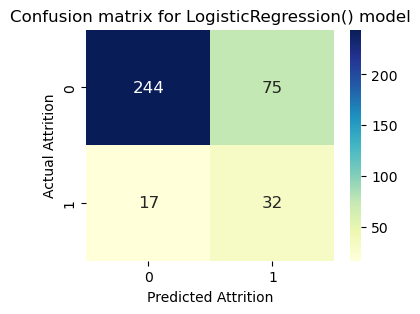


Cross validation score of the LogisticRegression() model : 0.8387755102040817


In [36]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,x_test,y_test,train=True)
score(lr,X_train,Y_train,x_test,y_test,train=False)

cv(lr)

Accuracy of train set:  1.0
Accuracy of test set:  0.7989130434782609

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           0       0.89      0.87      0.88       319
           1       0.27      0.31      0.29        49

    accuracy                           0.80       368
   macro avg       0.58      0.59      0.59       368
weighted avg       0.81      0.80      0.80       368



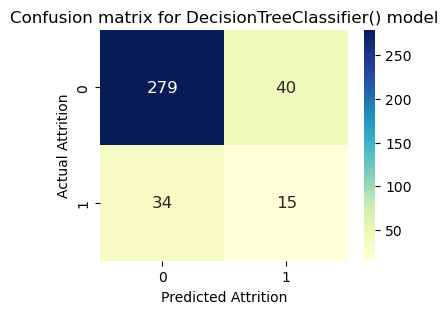


Cross validation score of the DecisionTreeClassifier() model : 0.7993197278911565


In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

score(dt,X_train,Y_train,x_test,y_test,train=True)
score(dt,X_train,Y_train,x_test,y_test,train=False)
cv(dt)

Accuracy of train set:  1.0
Accuracy of test set:  0.8722826086956522

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           0       0.89      0.97      0.93       319
           1       0.56      0.20      0.30        49

    accuracy                           0.87       368
   macro avg       0.72      0.59      0.61       368
weighted avg       0.84      0.87      0.85       368



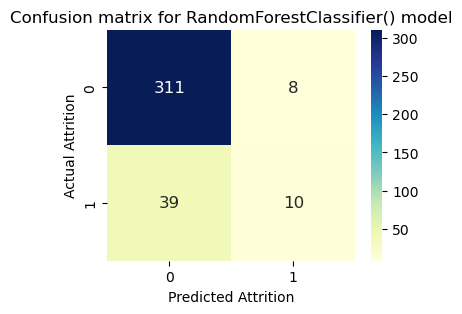


Cross validation score of the RandomForestClassifier() model : 0.8598639455782312


In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,x_test,y_test,train=True)
score(rf,X_train,Y_train,x_test,y_test,train=False)
cv(rf)

Accuracy of train set:  0.9715536105032823
Accuracy of test set:  0.8505434782608695

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           0       0.92      0.91      0.91       319
           1       0.44      0.45      0.44        49

    accuracy                           0.85       368
   macro avg       0.68      0.68      0.68       368
weighted avg       0.85      0.85      0.85       368



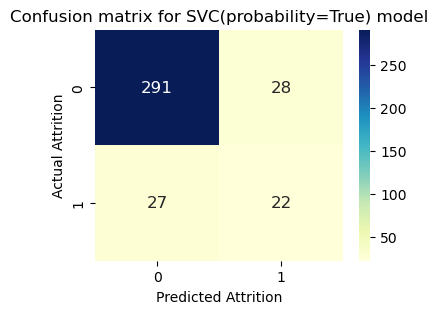


Cross validation score of the SVC(probability=True) model : 0.8387755102040817


In [39]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,x_test,y_test,train=True)
score(svc,X_train,Y_train,x_test,y_test,train=False)
cv(svc)

Accuracy of train set:  0.9710065645514223
Accuracy of test set:  0.8777173913043478

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           0       0.89      0.97      0.93       319
           1       0.60      0.24      0.35        49

    accuracy                           0.88       368
   macro avg       0.75      0.61      0.64       368
weighted avg       0.85      0.88      0.85       368



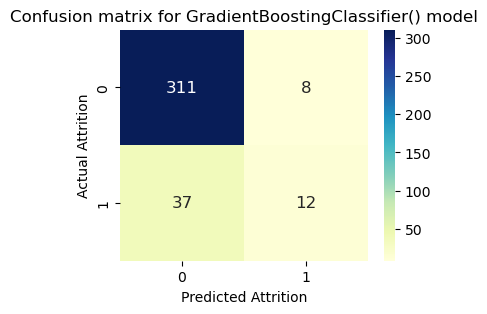


Cross validation score of the GradientBoostingClassifier() model : 0.864625850340136


In [40]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,x_test,y_test,train=True)
score(gbc,X_train,Y_train,x_test,y_test,train=False)
cv(gbc)

Accuracy of train set:  1.0
Accuracy of test set:  0.8668478260869565

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model  :

               precision    recall  f1-score   support

           0       0.89      0.96      0.93       319
           1       0.50     

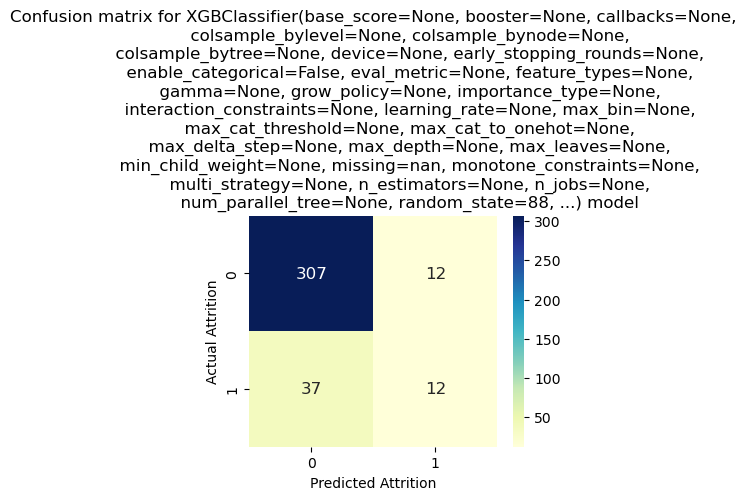


Cross validation score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model : 0.8666666666666666


In [41]:
# XGBoost
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=88)
xg.fit(X_train,Y_train)

score(xg,X_train,Y_train,x_test,y_test,train=True)
score(xg,X_train,Y_train,x_test,y_test,train=False)
cv(xg)

Observations:  

    All models can easily classify employees who will not attrition than the employees who will attrition.  
    As there are instances of false negatives, we can use 'precision-recall-curve' to find the better model which classifies employees more correctly. 

F1 score of Logistic Regression model is  0.4102564102564103
F1 score of Decision Tree model is  0.16842105263157894
F1 score of Random Forest model is  0.36363636363636365
F1 score of SVC model is  0.4444444444444445
F1 score of Gradient Boosting model is  0.34782608695652173
F1 score of XGBoost model is  0.3287671232876712


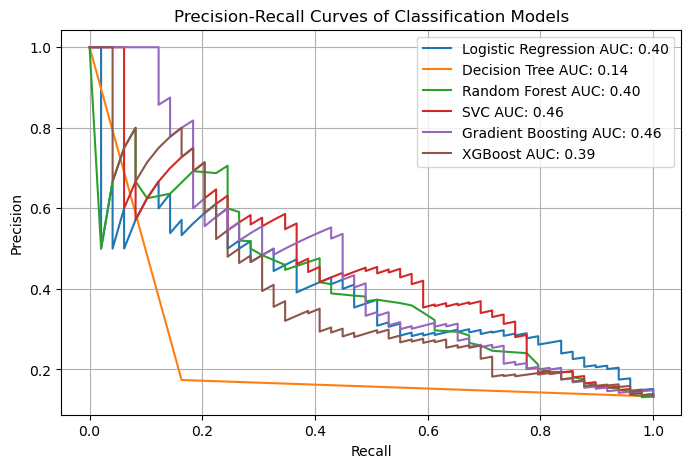

In [42]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Logistic Regression': lr,'Decision Tree': dt, 'Random Forest': rf,'SVC': svc,
          'Gradient Boosting': gbc,'XGBoost': xg}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observations:  
    
    Support Vector Machine (svc) model has the highest F1 score indicating that the model classify the attrition categories better than other models. Comparitively higher F1 score also tells us that the model has less false positives and false negatives than the others.   
    The SVM model (red curve) has the highest AUC (0.46) in the precision recall plot and also the highest accuracy score of 0.85.
    On account of the F1 and AUC score, we can select the best  model as SVM with the following score metrics:
    
        Accuracy of train set:  0.97
        Accuracy of test set:  0.85
        Cross validation score : 0.84
        F1 score: 0.44
        AUC: 0.46

In [43]:
# Hyperparameter tuning of the selected Support Vector Machine (svc) model using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

params={'C': [0.1,1,10,100,1000], 'kernel':['linear','sigmoid','poly','rbf'], 'gamma':[0.1,1,10,100] }

rs=RandomizedSearchCV(estimator=svc,param_distributions=params,scoring='accuracy',cv=5)

rs.fit(X_train,Y_train)

print(f'Best parameters for Random Forest model: {rs.best_params_} and best score is : {rs.best_score_}')

Best parameters for Random Forest model: {'kernel': 'poly', 'gamma': 0.1, 'C': 1} and best score is : 0.9201392319784414


Accuracy of train set:  1.0
Accuracy of test set:  0.8668478260869565

Classification report of SVC(C=900, gamma=0.05, probability=True) model  :

               precision    recall  f1-score   support

           0       0.90      0.95      0.93       319
           1       0.50      0.31      0.38        49

    accuracy                           0.87       368
   macro avg       0.70      0.63      0.65       368
weighted avg       0.85      0.87      0.85       368



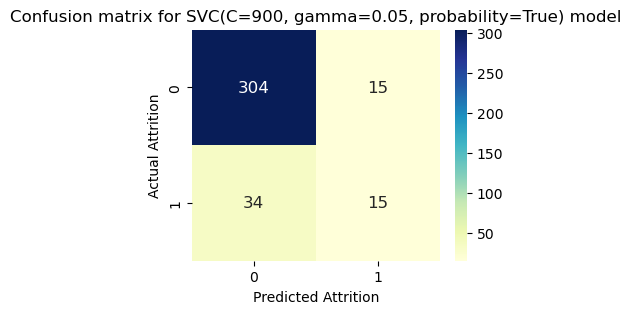


Cross validation score of the SVC(C=900, gamma=0.05, probability=True) model : 0.8387755102040817


In [44]:
# Tuned Support Vector Machine (svc) model (manual tuning also done)

svc1=SVC(probability=True,kernel= 'rbf', gamma= 0.05, C=900)
svc1.fit(X_train,Y_train)

score(svc1,X_train,Y_train,x_test,y_test,train=True)
score(svc1,X_train,Y_train,x_test,y_test,train=False)
cv(svc1)

Observations:  
    
    Hyperparameter tuning improved the test accuracy but it led to classification of more false negatives. So we can choose the initial svm model as the best model

In [45]:
# save the model

pickle.dump(svc, open('HR_attrition_Prediction_svc.pkl','wb'))

In [47]:
# load model and view predicted attrition vs actual attrition

HR_attrition_Prediction_model = pickle.load(open('HR_attrition_Prediction_svc.pkl','rb'))
y_pred = HR_attrition_Prediction_model.predict(x_test)

result=pd.DataFrame({'Predicted attrition':y_pred,'Actual attrition':y_test})
result.tail()

,Predicted attrition,Actual attrition
40,0,0
1220,0,0
605,0,0
1437,0,0
967,0,0


Observation:  

    The SVM model was able to predict the attrition similar to the actual attrition. 

# Overall Summary

The dataset on "HR Analytics" was used to analyse and build machine learning models to predict the employee attrition based on different indicators/features.

# Dataset Overview
    Data majorly contains details of employees who has not attritioned
    Majority employees in the dataset have travelled rarely for business requirements
    Data represent employees from 3 departments - Research & Development, Sales and Human Resources out of which most employees are from Research & Development department
    Majority employees has Education field as Life Sciences and Job role as Sales Executive 
    Male employees are more represented in the data than female employees
    Standard working hours of all employees is 80 hours
    Married employees are common than single/divorced employees
    All employees are over 18 in age and age ranges from 18-60 years
    Overtime is not common for the employees in the dataset



# Data Insights

    Employees who have attritioned more showed the following key trends:
        Job role was Laboratory Technician
        Marital status was 'single'
        Done overtime work
        Belonged to 26-35 age category
        Total working year is 1
        
    Employees who has not attritioned/ employees who stayed back in the employment showed the following key trends:
        Job role was Sales Executive
        Marital status was 'married'
        No/less overtime work
        Belonged to 26-35 age category
        
    Key findings:
        * Single employees tend to attrition more than married employees
        * Laboratory Technicians are more prone to attrition
        * Overtime work is one of the causes resulting in 53.59% of attrition of employees
        * Employees at the early stages of theor career are more prone to attrition
        
  

# Selected model

Support Vector Machine (svc) model is found to be the best model among the 6 models for this classification task with:

   * Accuracy of train set:  0.97
   * Accuracy of test set:  0.85
   * Cross validation score : 0.84
   * F1 score: 0.44
   * AUC: 0.46
   
Support Vector Machine (svc) model has the highest F1 score indicating that the model classify the attrition categories better than other models. Comparitively higher F1 score also tells us that the model has less false positives and false negatives than the others.   
    The SVM model (red curve) has the highest AUC (0.46) in the precision recall plot and also the highest accuracy score of 0.85.
    On account of the F1 and AUC score, SVM is selected as the best model.
        